In [18]:
import statsmodels.formula.api as sm

In [1]:
%run "Common.ipynb"

Time                                   \
                                        min                        max count   
Model     Device                                                               
M10+      01      2024-08-18 17:00:00+08:00  2024-09-21 14:00:00+08:00   471   
          02      2024-08-18 17:00:00+08:00  2024-08-24 14:00:00+08:00   136   
          03      2024-08-17 20:00:00+08:00  2024-09-21 14:00:00+08:00   825   
M2000C II 00            2024-09-21 14:58:56        2024-09-28 15:19:13  2021   

                   Floor Location  
                 nunique  nunique  
Model     Device                   
M10+      01           1        2  
          02           1        3  
          03           1        3  
M2000C II 00           1        1

## Correlating PM<sub>2.5</sub> and PM<sub>10</sub>

The M2000C II is the only device that measures PM<sub>10</sub> (in addition to PM<sub>2.5</sub>). However, we see empirically that the two values are highly correlated, with an R<super>2</super> of 0.9988.

This means that even though the M10+ devices do not measure PM<sub>10</sub>, we can estimate it from the PM<sub>2.5</sub> values with a fairly high confidence.

Text(0, 1, 'PM10(ug/m³) = PM2.5(ug/m³) × 1.5472 (r²=0.9988)')

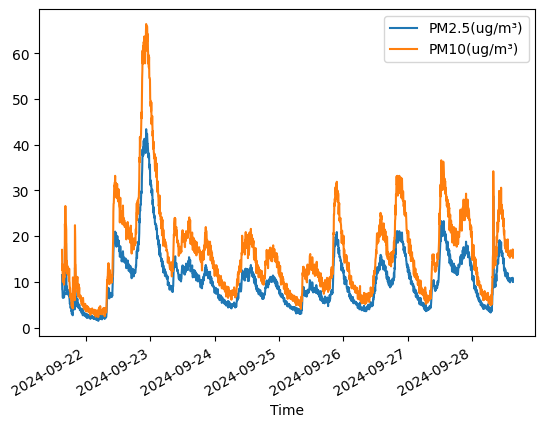

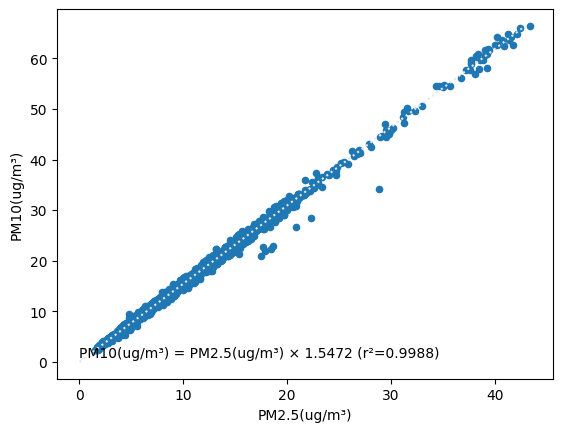

In [33]:
tgt = "PM2.5(ug/m³)"
src = "PM10(ug/m³)"
m2000c_df.set_index("Time").sort_index()[[tgt, src]].plot()
regression = sm.ols(formula=f"Q('{tgt}') ~ Q('{src}') -1", data=m2000c_df).fit()
coefficient = regression.params.values[0]
max_src = m2000c_df[src].max()
ax = m2000c_df.plot.scatter(tgt, src)
ax.plot([0, max_src * coefficient], [0, max_src], color="0.9", linestyle="dotted")
ax.text(x=0, y=1, s=f"{src} = {tgt} × {1 / coefficient:.4f} (r²={regression.rsquared:.4f})")
